###Descriptive Analytics

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


**Import Depedencies/Libraries**

In [ ]:
import pandas as pd #data manipulation
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data visualization

**Load data from GDrive**

In [ ]:
df = pd.read_csv("/gdrive/MyDrive/binar-fd/train_preprocess.tsv", sep= "\t", names= ["text", "label"])

**Check head & tail from dataset**

In [ ]:
df.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [ ]:
df.tail()

,text,label
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative
10999,meskipun sering belanja ke yogya di riau junct...,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11000 non-null  object
 1   label   11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB


In [ ]:
df.describe()

,text,label
count,11000,11000
unique,10933,3
top,kesal,positive
freq,4,6416


**Check num of total data & columns**

In [ ]:
df.shape #(row, column)

(11000, 2)

**Check & handle duplicate data**

In [ ]:
df.duplicated().sum()

67

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

**Check & handle missing values**

In [ ]:
df.isna()

,text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10993,False,False
10994,False,False
10996,False,False
10998,False,False


In [ ]:
df.isna().sum()/df.shape[0]

text     0.0
label    0.0
dtype: float64

**Feature Engineering - Create new columns based on existing columns**

In [ ]:
df['total_char'] = df.text.apply(len)

In [ ]:
df.head()

,text,label,total_char
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,404
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,102
2,lokasi strategis di jalan sumatera bandung . t...,positive,184
3,betapa bahagia nya diri ini saat unboxing pake...,positive,93
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,214


In [ ]:
df['total_word'] = df.text.apply(lambda sent: len(sent.split()))

In [ ]:
df.head()

,text,label,total_char,total_word
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,404,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,102,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,184,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,93,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,214,38


####EDA (Exploratory Data Analysis)

1. Univariate Analysis = Analisa melibatkan hanya satu variable
2. Bivariate Analysis = Analisa melibatkan dua variable
3. Multivariate Analyis = Analisa melibatkan lebih dari dua variable

#####Univariate Analysis
1. measure of central tendency : mendeskripsikan frekuensi (mean, median, mode) suatu kelompok

2. measure of spread: mendeskripsikan seberapa menyebar suatu data (range, quartile, variance, std)

3. measure of describe shape of distribution: mendeskripsikan atau persebaran data berdasarkan grafik (skewness, kurtosis)

######1. measure of central tendency

In [ ]:
#mean: rata-rata
df.mean()

<ipython-input-18-2a1c15a79e51>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


total_char    189.614561
total_word     33.060551
dtype: float64

In [ ]:
#median: nilai tengah
df.median()

<ipython-input-19-7d6a164fe32c>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


total_char    161.0
total_word     28.0
dtype: float64

In [ ]:
#mode: freq data yang sering muncul
df['total_char'].mode()

0    120
dtype: int64

In [ ]:
#mode: freq data yang sering muncul
df['total_word'].mode()

0    10
dtype: int64

######2. measure of spread

In [ ]:
#range: perbedaan min dan max
range_total_word = df.total_word.max() - df.total_word.min()
range_total_word

109

In [ ]:
#range: perbedaan min dan max
range_total_char = df.total_char.max() - df.total_char.min()
range_total_char

564

In [ ]:
#quartile dan interquartile range

#cari nilai minimum
p0_char = df.total_char.min()

#cari nilai maximum
p100_char = df.total_char.max()

#cari quartile 1
q1_char = df.total_char.quantile(0.25)

#cari quartile 2
q2_char = df.total_char.quantile(0.5)

#cari quartile 3
q3_char = df.total_char.quantile(0.75)

#cari IQR
iqr_char = q3_char - q1_char

#cari batas bawah
lower_limit_char = q1_char - 1.5 * iqr_char

#cari batas atas
upper_limit_char = q3_char + 1.5 * iqr_char

In [ ]:
print("batas bawah `total_char` : ", lower_limit_char)
print("nilai minimum :", p0_char)

if lower_limit_char < p0_char:
  print("tidak ada outlier dari sisi batas bawah")
else:
  print("ada outlier dari sisi batas bawah")

print()

print("batas atas `total_char` : ", upper_limit_char)
print("nilai minimum", p100_char)

if upper_limit_char > p100_char:
  print("tidak ada outlier dari sisi batas atas")
else:
  print("ada outlier dari sisi batas atas")

batas bawah `total_char` :  -186.5
nilai minimum : 3
tidak ada outlier dari sisi batas bawah

batas atas `total_char` :  553.5
nilai minimum 567
ada outlier dari sisi batas atas


In [ ]:
#quartile dan interquartile range

#cari nilai minimum
p0 = df.total_word.min()

#cari nilai maximum
p100 = df.total_word.max()

#cari quartile 1
q1 = df.total_word.quantile(0.25)

#cari quartile 2
q2 = df.total_word.quantile(0.5)

#cari quartile 3
q3 = df.total_word.quantile(0.75)

#cari IQR
iqr = q3 - q1

#cari batas bawah
lower_limit = q1 - 1.5 * iqr

#cari batas atas
upper_limit = q3 + 1.5 * iqr

In [ ]:
print("batas bawah `total_word` : ", lower_limit)
print("nilai minimum :", p0)

if lower_limit < p0:
  print("tidak ada outlier dari sisi batas bawah")
else:
  print("ada outlier dari sisi batas bawah")

print()

print("batas atas `total_word` : ", upper_limit)
print("nilai minimum", p100)

if upper_limit > p100:
  print("tidak ada outlier dari sisi batas atas")
else:
  print("ada outlier dari sisi batas atas")

batas bawah `total_word` :  -32.0
nilai minimum : 1
tidak ada outlier dari sisi batas bawah

batas atas `total_word` :  96.0
nilai minimum 110
ada outlier dari sisi batas atas


In [ ]:
#variance

print(df.mean())
print(df.var())

total_char    189.614561
total_word     33.060551
dtype: float64
total_char    14600.712931
total_word      446.955536
dtype: float64


<ipython-input-28-1791b7b4f2e5>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())
<ipython-input-28-1791b7b4f2e5>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.var())


In [ ]:
#std

print(df.mean())
print(df.std())

total_char    189.614561
total_word     33.060551
dtype: float64
total_char    120.833410
total_word     21.141323
dtype: float64


<ipython-input-29-7beeb3394992>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())
<ipython-input-29-7beeb3394992>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std())


######3. measure of describe shape (skewness, kurtosis)

In [ ]:
df.skew()

<ipython-input-30-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


total_char    0.560780
total_word    0.536978
dtype: float64

In [ ]:
df.kurtosis()

<ipython-input-31-c7edf97eb14c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


total_char   -0.756575
total_word   -0.769288
dtype: float64

###### Visualisasi Pie Chart

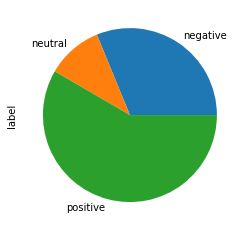

In [ ]:
df.groupby('label').label.count().plot(kind= 'pie')

###### Visualisasi Histogram Chart

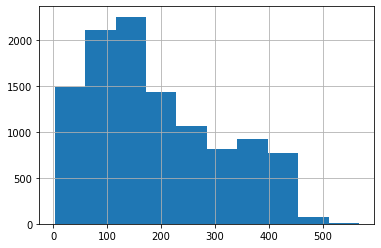

In [ ]:
df.total_char.hist()

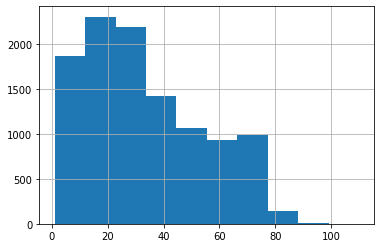

In [ ]:
df.total_word.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7da30e2250>,
      dtype=object)

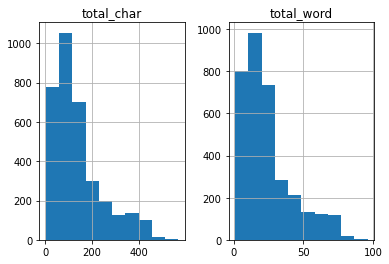

In [ ]:
df_nagative = df.loc[df['label']=='negative']
df_nagative.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7da2ea7fa0>,
      dtype=object)

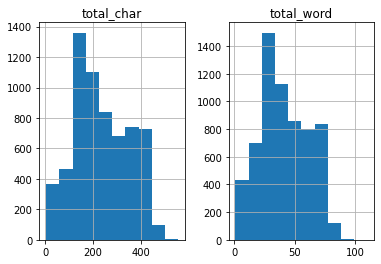

In [ ]:
df_positive = df.loc[df['label']=='positive']
df_positive.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7da2d8a2b0>,
      dtype=object)

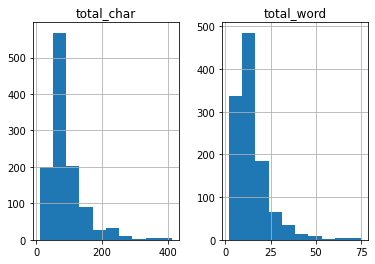

In [ ]:
df_neutral = df.loc[df['label']=='neutral']
df_neutral.hist()

###### Visualisasi Wordcloud Chart

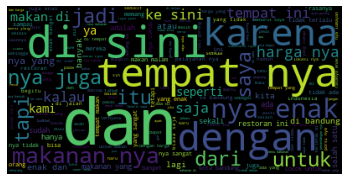

In [ ]:
from wordcloud import WordCloud
text = ' '.join(df['text'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

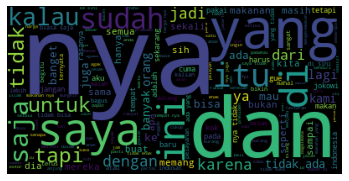

In [ ]:
from wordcloud import WordCloud

df_negative = df.loc[df['label']=='negative']

text = ' '.join(df_negative['text'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#####Bivariate Analysis


In [ ]:
df.corr()

,total_char,total_word
total_char,1.000000,0.991289
total_word,0.991289,1.000000


###### Scatter Plot

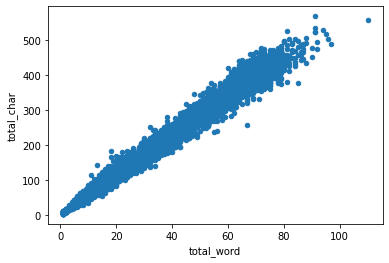

In [ ]:
df.plot(x="total_word", y="total_char", kind="scatter")

###### Bar Plot

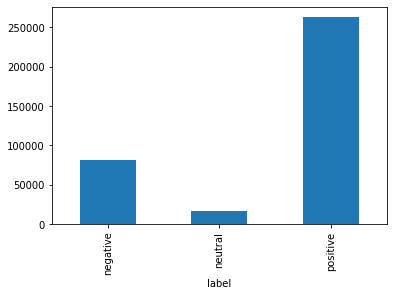

In [ ]:
df.groupby('label').total_word.sum().plot(kind='bar')

###conclusion

1. Univariate Analysis

  a. Dalam statistik deskriptif menunjukan data yang diolah punya outlier tapi tidak begitu signifikan.

  b. Dalam visualisasi menunjukan:
    - Total karakter dan total kata memiliki panjang 100-200 karakter dan 24-40 kata.
    - Sentiment terbanyak adalah sentimen positif, selanjutnya sentimen negatif, dan yang terkahir sentimen netral.
    - Total karakter dan kata yang paling banyak adalah sentimen positif yakni 200-400 karakter dan 30-70 kata.
    - Pada sentimen positif kata yangs sering muncul adalah "dan","di","sini", "tempat", "nya", dan "enak"


2. Bivariate Analysis

  a. Dalam statistik deskriptif menunjukan variable total_char memiliki korelasi positif dengan total_char

  b. Dalam visualisasi menunjukan:
    - Variable total_char dan total_word terkonfirmasi memiliki korelasi positif.
    - Total karakter dan kata yang paling banyak sentimen positif.
